# Import **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from geopy.distance import geodesic
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


#  Load the Dataset


In [2]:
df = pd.read_csv("/content/fraudTest.csv")
df.shape

(36659, 23)

# Basic Info & Data **Cleaning**

In [3]:
# Basic info
print(df.info())
print(df.isnull().sum())

# Check value distribution
print(df['is_fraud'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36659 entries, 0 to 36658
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             36659 non-null  int64  
 1   trans_date_trans_time  36659 non-null  object 
 2   cc_num                 36659 non-null  float64
 3   merchant               36659 non-null  object 
 4   category               36659 non-null  object 
 5   amt                    36659 non-null  float64
 6   first                  36659 non-null  object 
 7   last                   36659 non-null  object 
 8   gender                 36659 non-null  object 
 9   street                 36659 non-null  object 
 10  city                   36659 non-null  object 
 11  state                  36659 non-null  object 
 12  zip                    36659 non-null  int64  
 13  lat                    36659 non-null  float64
 14  long                   36659 non-null  float64
 15  ci

In [4]:
 df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [5]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
36654,36654,04-07-2020 05:45,3.894770e+13,fraud_Cummerata-Jones,gas_transport,83.24,Lori,Rodriguez,F,12087 Michael Light,...,39.3543,-82.5030,321,"Copywriter, advertising",24-06-1979,b379406eb83772d53202bbb4b0f4f7ab,1.372917e+09,38.699846,-82.162152,0.0
36655,36655,04-07-2020 05:47,3.506040e+15,fraud_Ankunding LLC,shopping_net,96.01,Michael,Orozco,M,13956 Hughes Causeway Suite 124,...,45.1939,-112.0568,286,Chief of Staff,09-03-1989,09ba910df90a1e1b15659ed7b20612a2,1.372917e+09,46.033108,-112.488332,0.0
36656,36656,04-07-2020 05:47,4.149640e+12,"fraud_Swaniawski, Bahringer and Ledner",grocery_net,42.96,Samuel,Farrell,M,428 Michael Tunnel Apt. 377,...,33.9778,-86.5598,3996,Aid worker,14-06-1977,3a7d22a082f733395a74b9fb9336c6b5,1.372917e+09,34.547597,-87.525474,0.0
36657,36657,04-07-2020 05:48,3.048760e+13,fraud_Kuhn LLC,misc_net,2.04,Stephanie,Crane,F,144 Martinez Curve,...,38.0970,-86.1723,350,Counsellor,05-01-1955,f272a4f0b7dcfa6a5e79826f5272510c,1.372917e+09,38.548603,-86.085321,0.0
36658,36658,04-07-2020 05:48,2.288810e+15,fraud_Kutch and Sons,grocery_pos,231.31,Barbara,Norman,F,6278 Stephanie Unions,...,40.8265,-73.9383,1577385,Herbalist,29-08-1981,81acc78c91c6,NaN,NaN,NaN,NaN


In [6]:
data_types = df.dtypes
data_types

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [7]:
df.describe()#This code summarizes the statistical properties of all the numeric columns

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,36659.000000,3.665900e+04,36659.000000,36659.000000,36659.000000,36659.000000,3.665900e+04,3.665800e+04,36658.000000,36658.000000,36658.000000
mean,18329.000000,4.152066e+17,69.707150,48611.230612,38.548838,-90.095775,8.960931e+04,1.372333e+09,38.545604,-90.095600,0.004283
std,10582.686096,1.305912e+18,153.010123,26798.852488,5.052368,13.590168,3.029898e+05,3.185353e+05,5.089216,13.601586,0.065304
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057104,-166.584303,0.000000
25%,9164.500000,1.800400e+14,9.670000,26041.000000,34.668900,-96.727000,7.430000e+02,1.372017e+09,34.756653,-96.778015,0.000000
50%,18329.000000,3.518670e+15,46.680000,48088.000000,39.371600,-87.456900,2.443000e+03,1.372368e+09,39.379757,-87.366825,0.000000
75%,27493.500000,4.634960e+15,82.870000,72011.000000,42.014400,-80.138100,2.032800e+04,1.372588e+09,41.974361,-80.200430,0.000000
max,36658.000000,4.992350e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372917e+09,66.669356,-66.955602,1.000000


In [8]:
print(df['is_fraud'].value_counts())

print("Fraud rate: {:.2f}%".format(df['is_fraud'].mean() * 100))


is_fraud
0.0    36501
1.0      157
Name: count, dtype: int64
Fraud rate: 0.43%


# **Outlier**

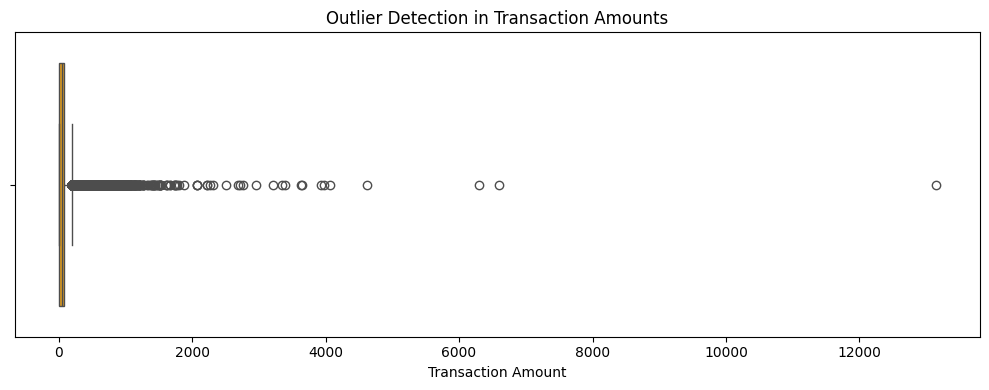

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['amt'], color='orange')
plt.title("Outlier Detection in Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

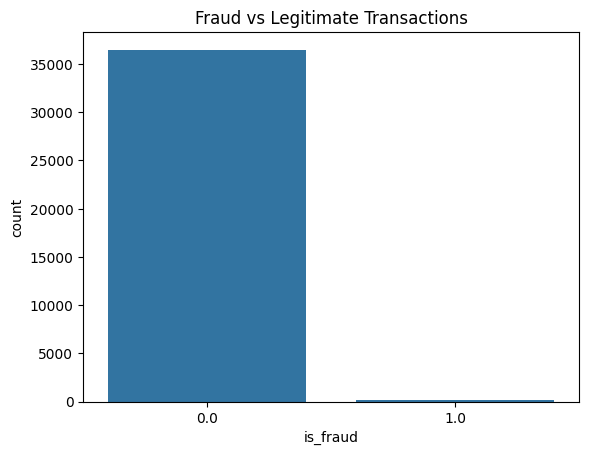

In [10]:
# Plot fraud distribution
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()

# The distribution of transaction amounts for both legitimate and fraudulent transactions. The plt.yscale('log') line sets the y-axis to a logarithmic scale, which is useful for visualizing data with a wide range of values, like transaction amounts.

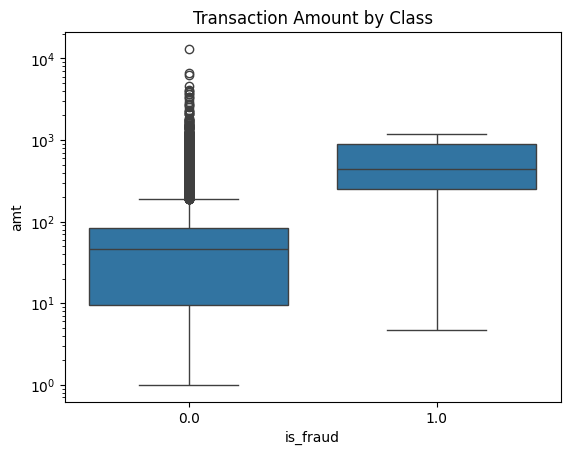

In [11]:
# Amount distribution
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title("Transaction Amount by Class")
plt.show()

In [12]:
# Top 5 fraud categories
print("Top fraud categories:")
print(df[df['is_fraud'] == 1]['category'].value_counts().head())

Top fraud categories:
category
shopping_net     38
grocery_pos      37
misc_net         21
shopping_pos     14
gas_transport     8
Name: count, dtype: int64


In [13]:
# Check for missing values in each column
mis_values = df.isnull().sum()
# Filter out columns with no missing values
mis_values = mis_values[mis_values > 0]
mis_values

,0
unix_time,1
merch_lat,1
merch_long,1
is_fraud,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36659 entries, 0 to 36658
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             36659 non-null  int64  
 1   trans_date_trans_time  36659 non-null  object 
 2   cc_num                 36659 non-null  float64
 3   merchant               36659 non-null  object 
 4   category               36659 non-null  object 
 5   amt                    36659 non-null  float64
 6   first                  36659 non-null  object 
 7   last                   36659 non-null  object 
 8   gender                 36659 non-null  object 
 9   street                 36659 non-null  object 
 10  city                   36659 non-null  object 
 11  state                  36659 non-null  object 
 12  zip                    36659 non-null  int64  
 13  lat                    36659 non-null  float64
 14  long                   36659 non-null  float64
 15  ci

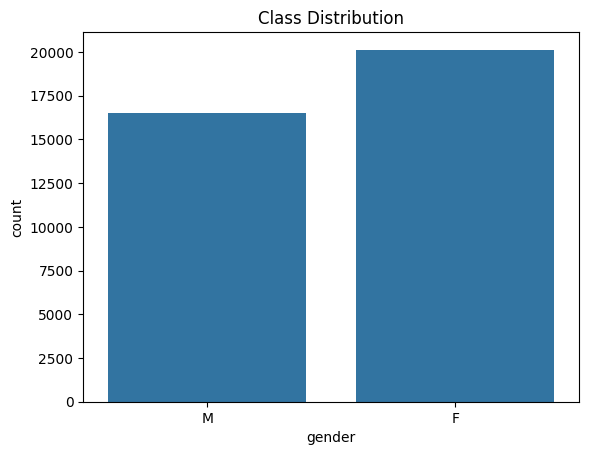

In [14]:
# Dataset Info
print(df.info())

# Check class distribution
print(df['gender'].value_counts())

# Visualize class distribution
sns.countplot(x='gender', data=df)
plt.title('Class Distribution')
plt.show()


# Model Training & Evaluation

Model Evaluation
python
Copy
Edit
**bold text**

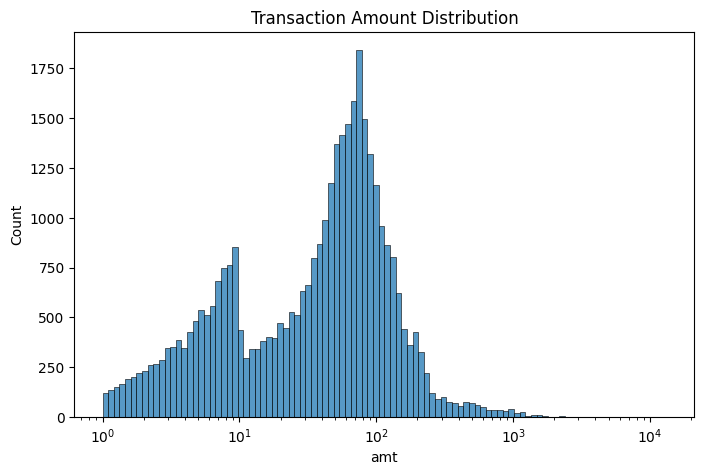

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['amt'], bins=100, log_scale=True)
plt.title('Transaction Amount Distribution')
plt.show()

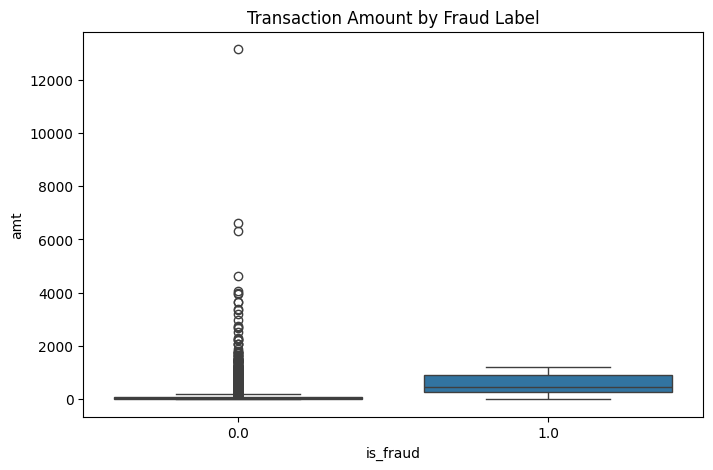

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount by Fraud Label')
plt.show()

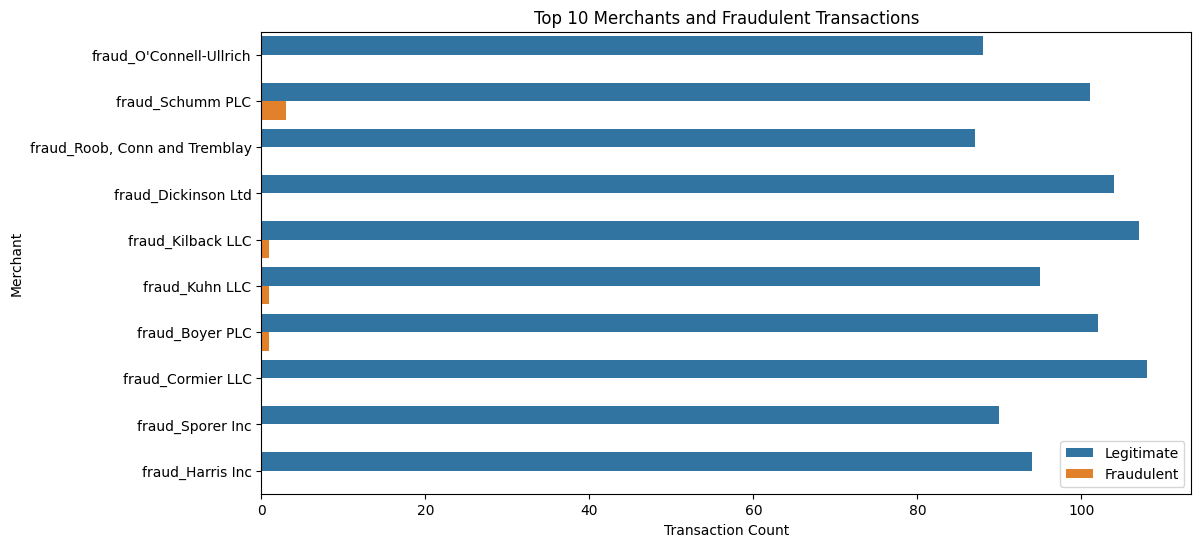

In [17]:
top_merchants = df['merchant'].value_counts().nlargest(10).index
merchant_df = df[df['merchant'].isin(top_merchants)]

plt.figure(figsize=(12,6))
sns.countplot(data=merchant_df, y='merchant', hue='is_fraud')
plt.title('Top 10 Merchants and Fraudulent Transactions')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

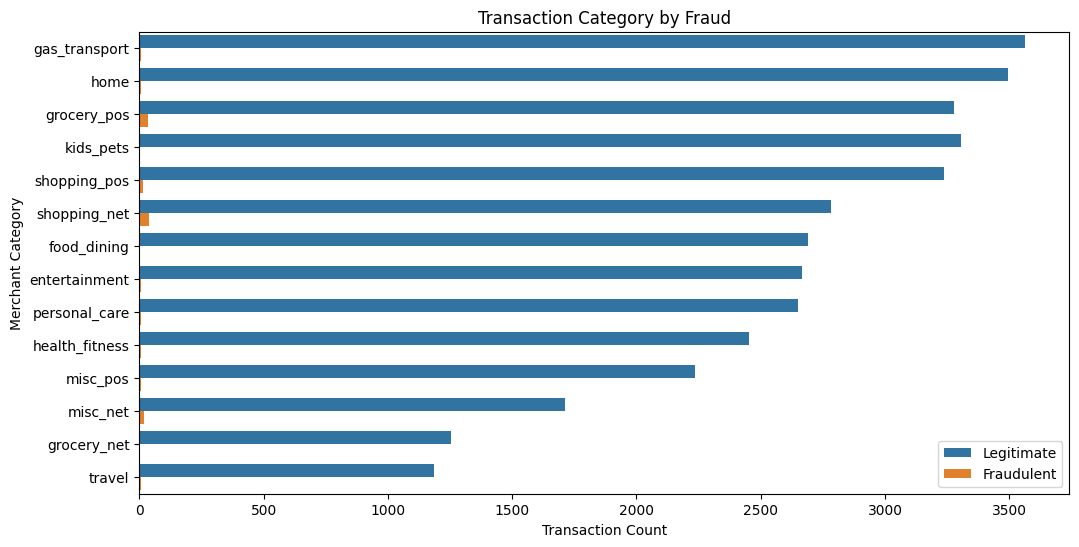

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, hue='is_fraud')
plt.title('Transaction Category by Fraud')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant Category')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

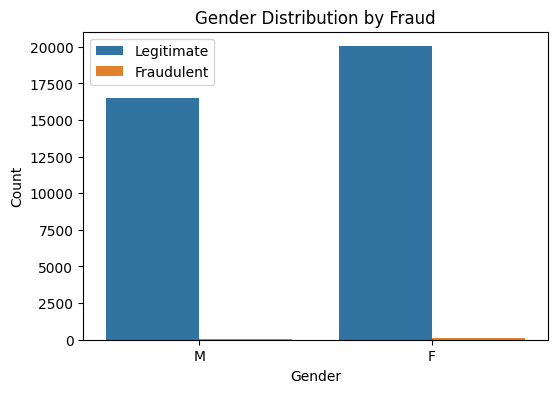

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Gender Distribution by Fraud')
plt.xlabel('Gender',)
plt.ylabel('Count')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

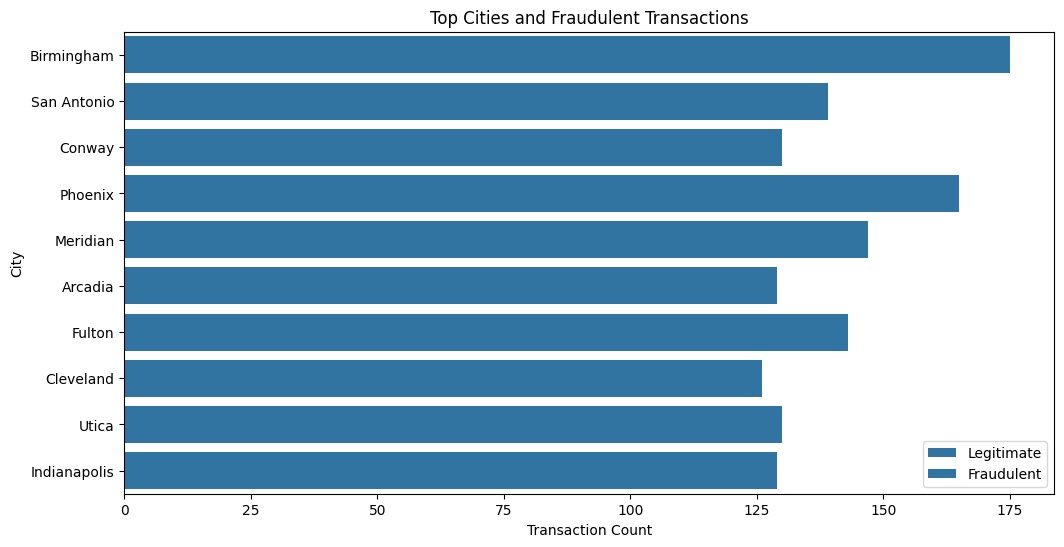

In [20]:
top_cities = df['city'].value_counts().nlargest(10).index
city_df = df[df['city'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.countplot(data=city_df, y='city', hue='is_fraud')
plt.title('Top Cities and Fraudulent Transactions')
plt.xlabel('Transaction Count')
plt.ylabel('City')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

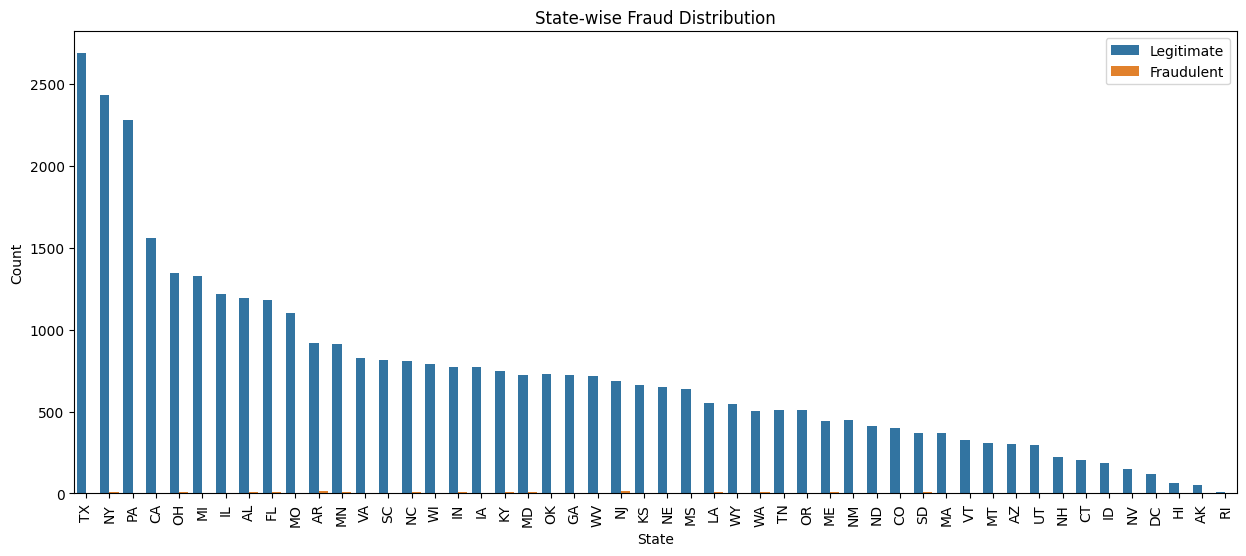

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index, hue='is_fraud')
plt.title('State-wise Fraud Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()


Missing values in the training dataset:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

Summary statistics for numeric columns in the training dataset:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  36659.000000  3.665900e+04  36659.000000  36659.000000  36659.000000   
mean   18329.000000  4.152066e+17     69.707150  48611.230612     38.548838   
std    10582.686096  1.

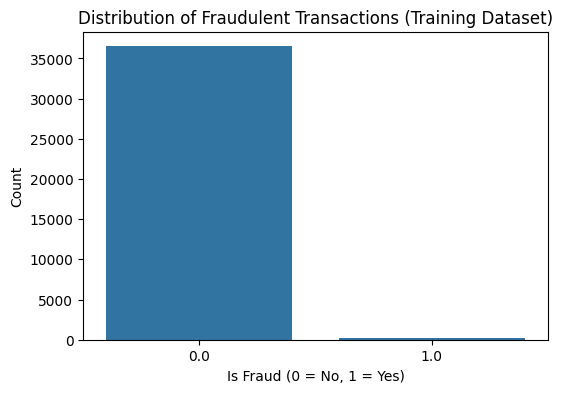

In [22]:
# Check for missing values in the training dataset
print("\nMissing values in the training dataset:")
print(df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns in the training dataset:")
print(df.describe())

# Distribution of the target variable ('is_fraud') in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions (Training Dataset)')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

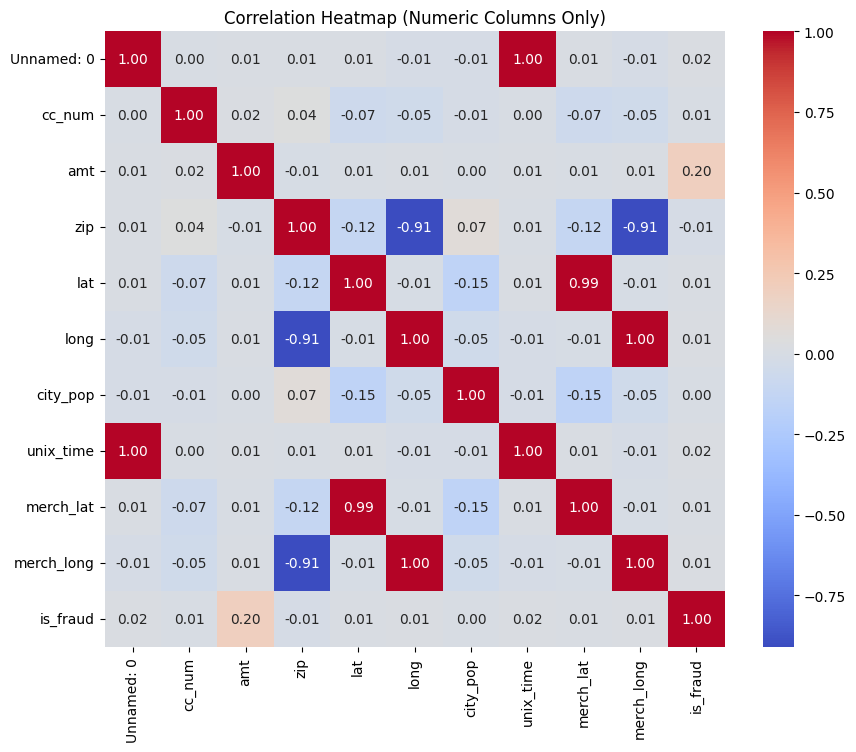

In [23]:
# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

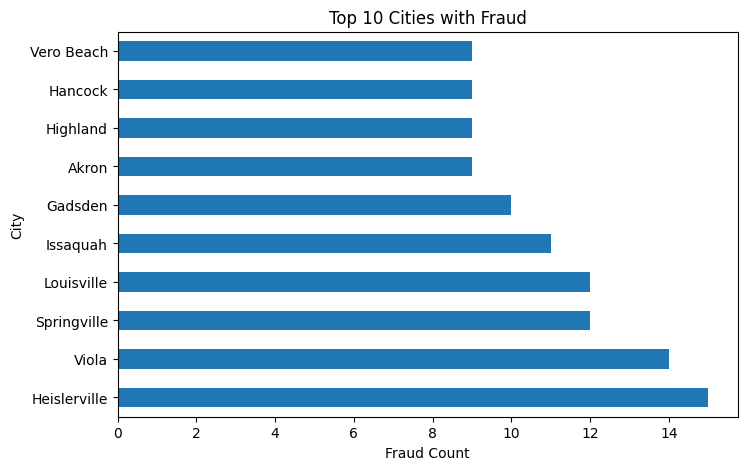

In [24]:
fraud_cities = df[df['is_fraud'] == 1]['city'].value_counts().head(10)
fraud_cities.plot(kind='barh', title="Top 10 Cities with Fraud", figsize=(8, 5))
plt.xlabel("Fraud Count")
plt.ylabel("City")
plt.show()


# **Basic ML Models**
Logistic Regression

In [25]:
# Step 1: Remove rows where 'is_fraud' is NaN
df = df[df['is_fraud'].notna()]

# Step 2: (Optional) Also remove NaNs from selected features if any
df = df.dropna()

# Step 3: Now continue normally
features = ['amt', 'city_pop', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long']
X = df[features]
y = df['is_fraud']

# Step 4: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 7: Evaluate
# Step 6: Now model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression:
[[7299    2]
 [  31    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7301
         1.0       0.00      0.00      0.00        31

    accuracy                           1.00      7332
   macro avg       0.50      0.50      0.50      7332
weighted avg       0.99      1.00      0.99      7332



In [26]:
from sklearn.preprocessing import StandardScaler
features = ['amt', 'city_pop', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long']
X = df[features]
y = df['is_fraud']


# Split your data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now scale it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree:
[[7287   14]
 [  18   13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7301
         1.0       0.48      0.42      0.45        31

    accuracy                           1.00      7332
   macro avg       0.74      0.71      0.72      7332
weighted avg       1.00      1.00      1.00      7332



# **Advanced ML Models**
## Random Forest





In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
[[7301    0]
 [  15   16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7301
         1.0       1.00      0.52      0.68        31

    accuracy                           1.00      7332
   macro avg       1.00      0.76      0.84      7332
weighted avg       1.00      1.00      1.00      7332



# XGBoost

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
[[7301    0]
 [   7   24]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7301
         1.0       1.00      0.77      0.87        31

    accuracy                           1.00      7332
   macro avg       1.00      0.89      0.94      7332
weighted avg       1.00      1.00      1.00      7332



# **ROC Curve Comparison**

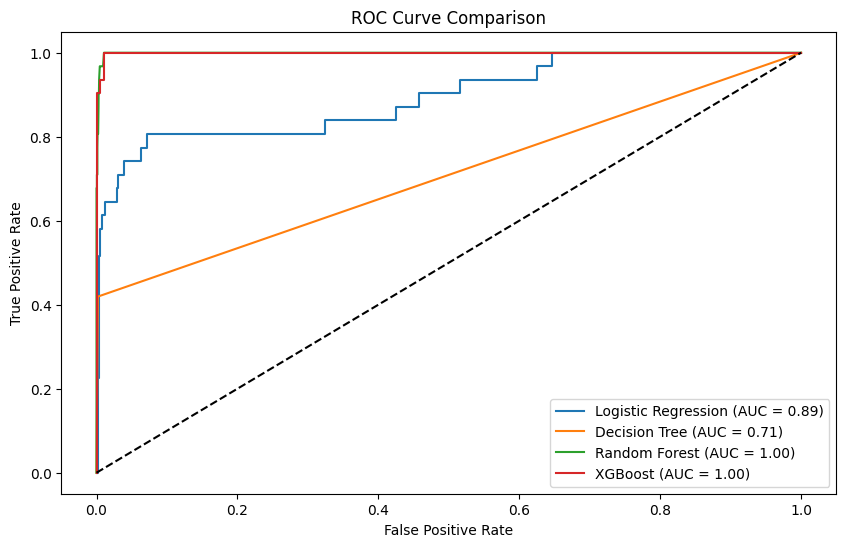

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb
}

plt.figure(figsize=(10,6))

for name, model in models.items():
    if name == 'Logistic Regression':
        probs = model.predict_proba(X_test_scaled)[:,1]
    else:
        probs = model.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


# **Hyperparameter Tuning (Example for Random Forest)**

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Estimator:", grid_rf.best_estimator_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(random_state=42)
